In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [7]:
df = pd.read_csv("car_purchasing.csv")
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [8]:
df.select_dtypes('object')

,customer name,customer e-mail,country
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil
...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe
497,Pearl,penatibus.et@massanonante.com,Philippines
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana


In [9]:
df.select_dtypes('object').nunique()

customer name      498
customer e-mail    500
country            211
dtype: int64

# Drop columns with low and high cardinality¶


In [11]:
df.drop(columns = ['customer name', 'customer e-mail', 'country', 'gender'], axis = 1, inplace = True)

In [12]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [14]:
X = df.drop('car purchase amount', axis = 1)
y = df['car purchase amount']

Text(0.5, 1.0, 'Scatter plot between Credit Card Debt and Annual Salary')

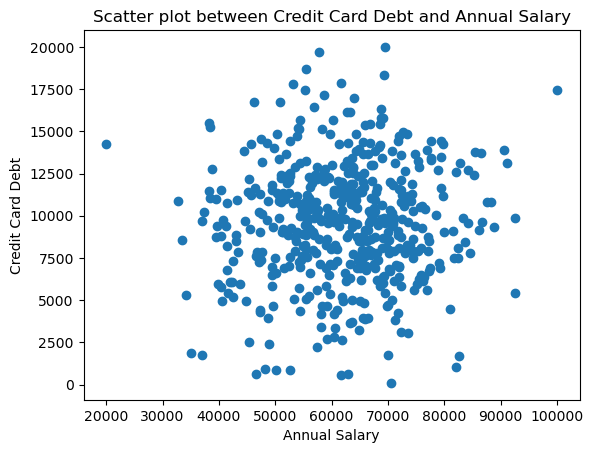

In [15]:
plt.scatter(df['annual Salary'], df['credit card debt'])
plt.xlabel('Annual Salary')
plt.ylabel('Credit Card Debt')
plt.title('Scatter plot between Credit Card Debt and Annual Salary')

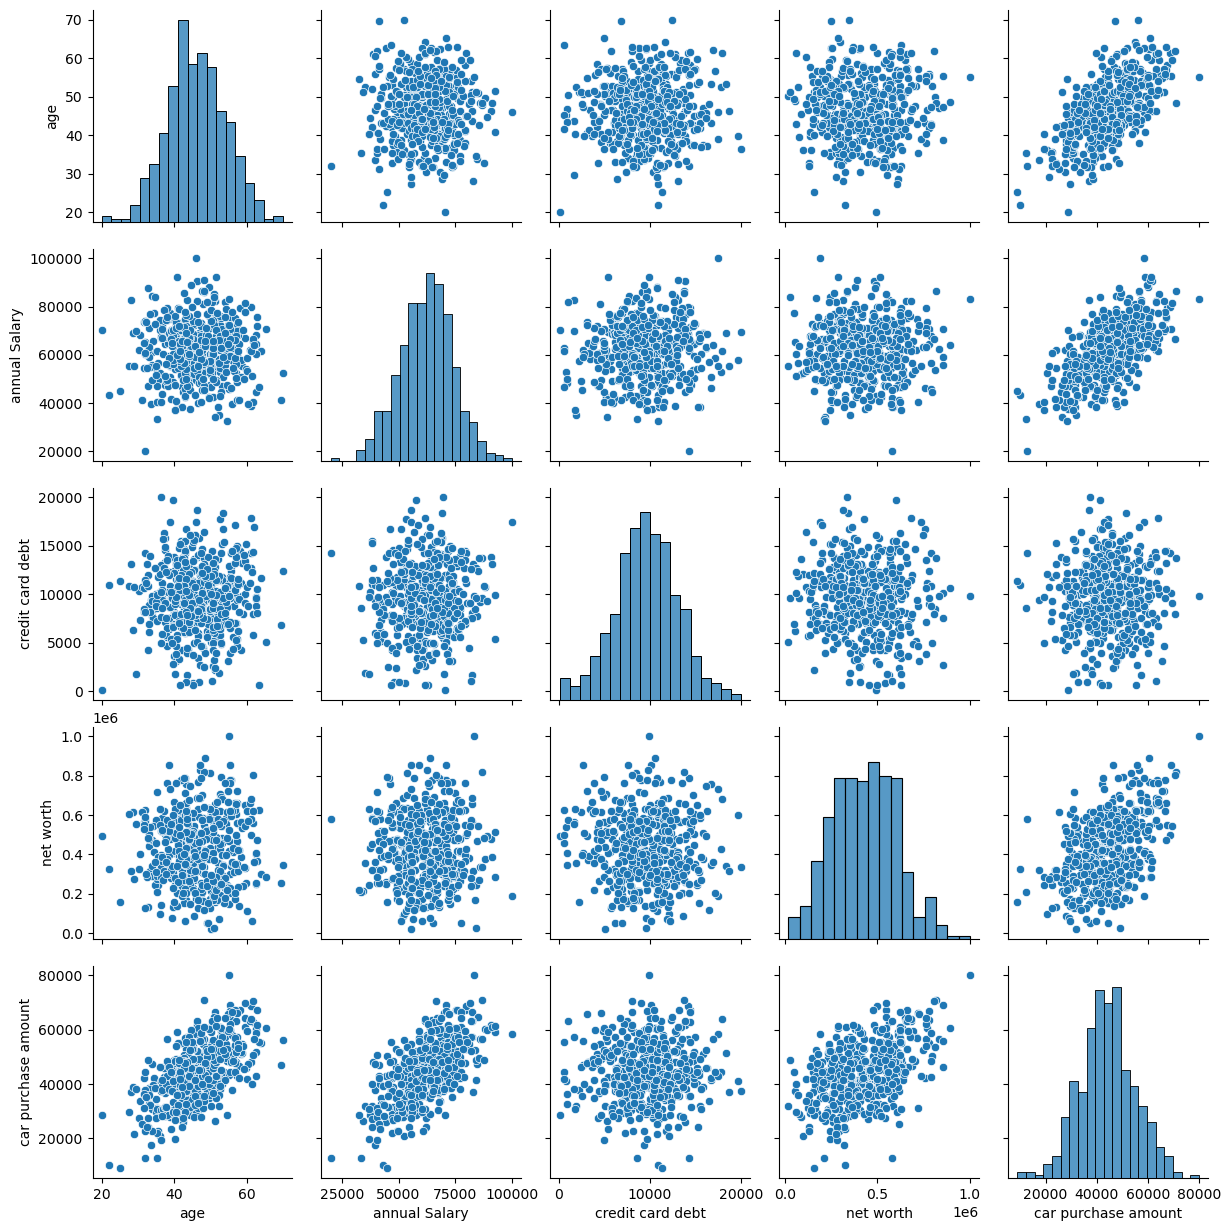

In [18]:
# Plotting Pairplot
sns.pairplot(df)

In [19]:
X.shape

(500, 4)

In [20]:
y.shape

(500,)

In [21]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [24]:
y_mean = y_train.mean()
y_mean

0.49219817948908456

In [25]:
y_pred = [y_mean] * len(y_train)
y_pred

[0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.49219817948908456,
 0.4921981

In [27]:
mean_absolute_error(y_train, y_pred)

0.11921386215413556

In [28]:
model  = Sequential()
model.add(Dense(10, activation = 'relu', input_dim = 4))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
hist = model.fit(X_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
10/10 [==============================] - 3s 60ms/step - loss: 0.2050 - mean_absolute_error: 0.4309 - val_loss: 0.1564 - val_mean_absolute_error: 0.3790
Epoch 2/50
10/10 [==============================] - 0s 12ms/step - loss: 0.1421 - mean_absolute_error: 0.3527 - val_loss: 0.1027 - val_mean_absolute_error: 0.3026
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0913 - mean_absolute_error: 0.2764 - val_loss: 0.0615 - val_mean_absolute_error: 0.2286
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0546 - mean_absolute_error: 0.2056 - val_loss: 0.0340 - val_mean_absolute_error: 0.1642
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0310 - mean_absolute_error: 0.1485 - val_loss: 0.0181 - val_mean_absolute_error: 0.1132
Epoch 6/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0184 - mean_absolute_error: 0.1092 - val_loss: 0.0104 - val_mean_absolute_error: 0.0830
Epoch 7/50
10/10 [====

In [32]:
training_accuracy = hist.history['mean_absolute_error']
training_loss = hist.history['loss']
validation_accuracy = hist.history['val_mean_absolute_error']
validation_loss = hist.history['val_loss']

In [33]:
index_loss = np.argmin(validation_loss)

In [34]:
val_lowest = validation_loss[index_loss]

In [35]:
index_acc = np.argmin(validation_accuracy)

In [36]:
acc_highest = validation_accuracy[index_acc]

In [38]:
Epochs = [ i+1 for i in range(len(training_accuracy))]
loss_label = f'best epoch = {str(index_loss + 1)}'
acc_label = f'best epoch = {str(index_acc + 1)}'


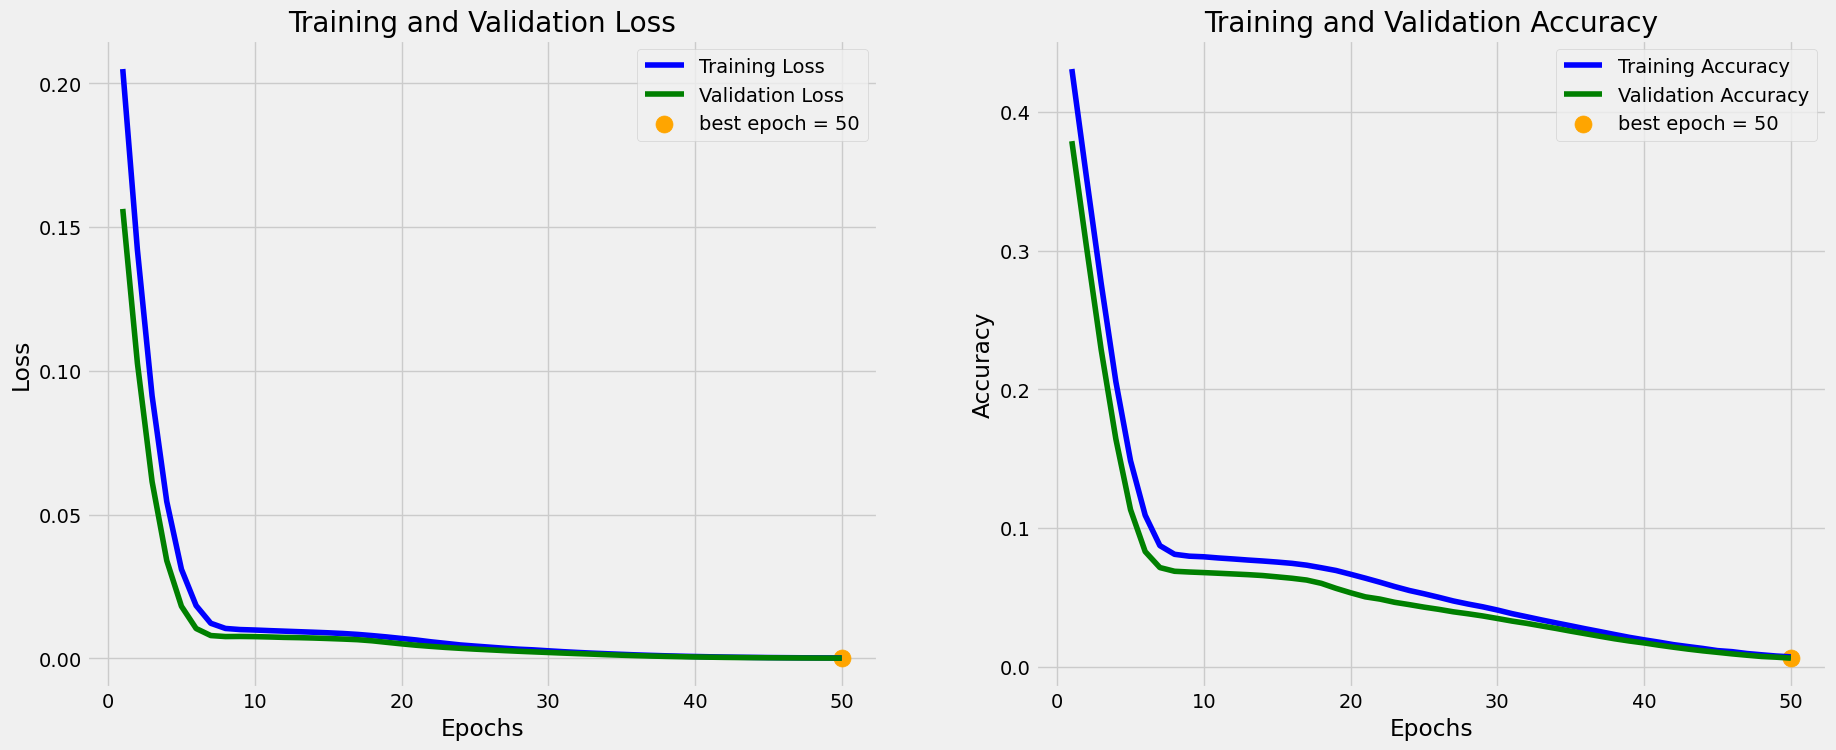

In [41]:
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs, training_loss, 'b', label = 'Training Loss')
plt.plot(Epochs, validation_loss, 'g', label = 'Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c= 'orange', label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs, training_accuracy, 'b', label = 'Training Accuracy')
plt.plot(Epochs, validation_accuracy, 'g', label = 'Validation Accuracy')
plt.scatter(index_acc+1, acc_highest, s = 150, c = 'orange', label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [42]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 8ms/step


In [43]:
y_pred

array([[0.5203764 ],
       [0.510591  ],
       [0.7530384 ],
       [0.33004886],
       [0.7141856 ],
       [0.75120455],
       [0.6037406 ],
       [0.6393538 ],
       [0.60799533],
       [0.5512077 ],
       [0.40954423],
       [0.6640326 ],
       [0.47050196],
       [0.42460364],
       [0.44651863],
       [0.6464633 ],
       [0.56163085],
       [0.12360064],
       [0.7141512 ],
       [0.58146304],
       [0.45809847],
       [0.6187886 ],
       [0.5961741 ],
       [0.41209257],
       [0.46480554],
       [0.40918994],
       [0.76402855],
       [0.553195  ],
       [0.2018435 ],
       [0.60483587],
       [0.6454569 ],
       [0.5231235 ],
       [0.45211825],
       [0.6840879 ],
       [0.47108245],
       [0.43298328],
       [0.73960644],
       [0.31319746],
       [0.4704002 ],
       [0.44803408],
       [0.6814312 ],
       [0.7193146 ],
       [0.5393306 ],
       [0.3933772 ],
       [0.6230065 ],
       [0.49868876],
       [0.37908977],
       [0.470

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test, y_pred)

0.9967016596824199